C:\Users\Hewlett Packard\AppData\Local\Temp\ipykernel_9784\2606104748.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarName'].replace({


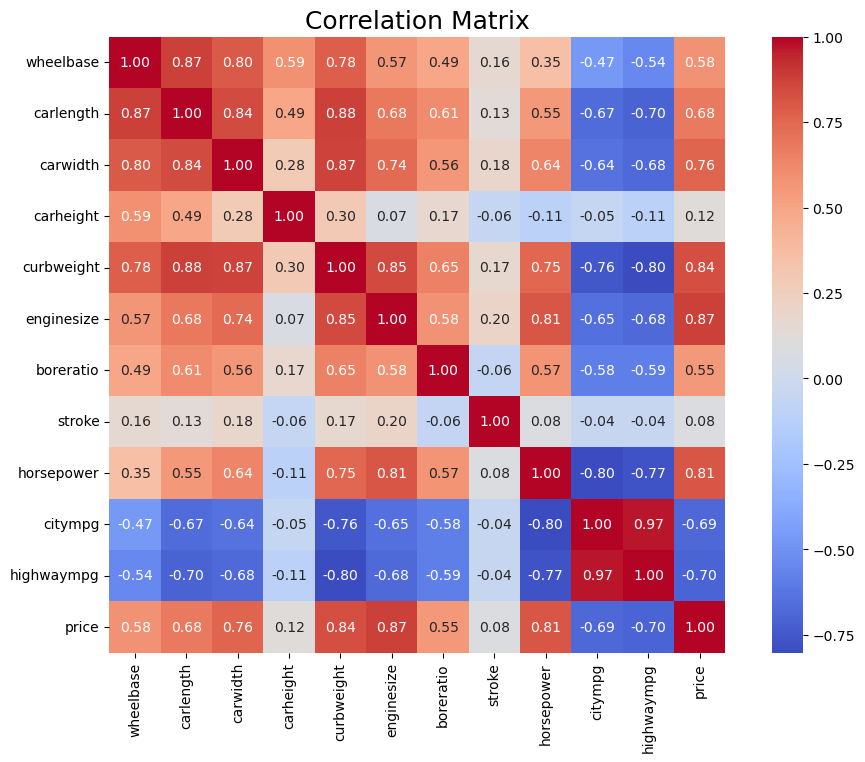

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ------------------ 1. LOAD DATA ------------------
df = pd.read_csv("CarPrice_Assignment.csv")

# ------------------ 2. CLEAN CARNAME ------------------
df['CarName'] = df['CarName'].apply(lambda x: x.split(" ")[0].lower())
df['CarName'].replace({
    'vw': 'volkswagen',
    'vokswagen': 'volkswagen',
    'porcshce': 'porsche',
    'toyouta': 'toyota'
}, inplace=True)

# ------------------ 3. SELECT ONLY NUMERIC COLUMNS YOU NEED ------------------
selected_cols = [
    'wheelbase',
    'carlength',
    'carwidth',
    'carheight',
    'curbweight',
    'enginesize',
    'boreratio',
    'stroke',
    'horsepower',
    'citympg',
    'highwaympg',
    'price'
]

df_numeric = df[selected_cols]

# ------------------ 4. CONVERT ALL TO NUMERIC SAFELY ------------------
df_numeric = df_numeric.apply(pd.to_numeric, errors='coerce')

# ------------------ 5. DROP ANY ROWS WITH MISSING VALUES ------------------
df_numeric = df_numeric.dropna()

# ------------------ 6. CORRELATION MATRIX ------------------
plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(),
            annot=True,
            cmap="coolwarm",
            fmt=".2f",
            square=True)

plt.title("Correlation Matrix", fontsize=18)
plt.show()

In [2]:
import statsmodels.formula.api as smf

model = smf.ols('price ~ enginesize + horsepower + curbweight + carbody + CarName + cylindernumber', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     80.82
Date:                Thu, 11 Dec 2025   Prob (F-statistic):           4.10e-88
Time:                        21:52:04   Log-Likelihood:                -1837.7
No. Observations:                 205   AIC:                             3747.
Df Residuals:                     169   BIC:                             3867.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [3]:
from statsmodels.stats.weightstats import ztest

ztest(df['price'])

(np.float64(23.794852923407117), np.float64(3.7757714151591704e-125))

In [4]:
import statsmodels.api as sm

model1 = smf.ols('price ~ enginesize', data=df).fit()
model2 = smf.ols('price ~ enginesize + horsepower', data=df).fit()

sm.stats.anova_lm(model1, model2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,203.0,3.070954e+09,0.0,NaN,NaN,NaN
1,202.0,2.690628e+09,1.0,3.803252e+08,28.553062,2.448881e-07


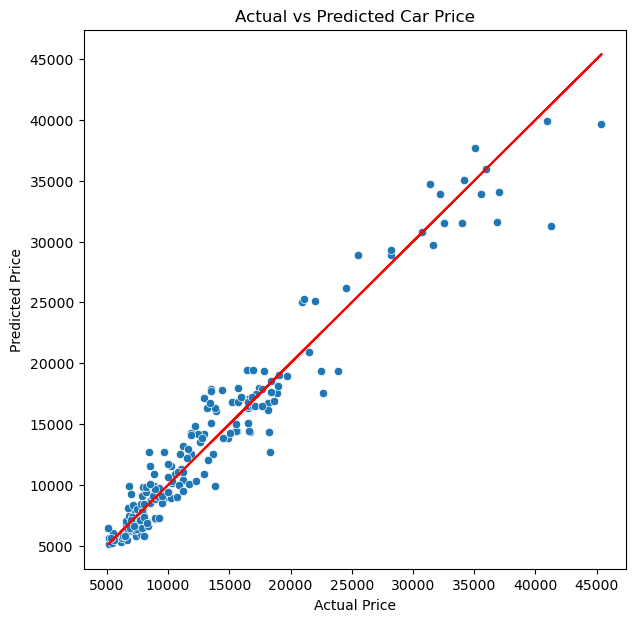

In [5]:
df['predicted'] = model.fittedvalues

plt.figure(figsize=(7,7))
sns.scatterplot(x=df['price'], y=df['predicted'])
plt.plot(df['price'], df['price'], color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Price")
plt.show()

In [6]:
import pandas as pd

df = pd.read_csv("CarPrice_Assignment.csv")

# Clean CarName
df['CarName'] = df['CarName'].apply(lambda x: x.split(" ")[0].lower())
df['CarName'].replace({
    'vw':'volkswagen',
    'vokswagen':'volkswagen',
    'porcshce':'porsche',
    'toyouta':'toyota'
}, inplace=True)

C:\Users\Hewlett Packard\AppData\Local\Temp\ipykernel_9784\2604033079.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CarName'].replace({


In [7]:
df = df.drop(['car_ID', 'symboling', 'compressionratio', 'peakrpm'], axis=1)

In [8]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col].astype(str))